In [103]:
#Loading the data
import pandas as pd
import os
import numpy as np

# Load the data
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/standard_test_3.csv')
data = pd.read_csv(input_csv_path)

data['distance_x'] = 10.0 - data['distance_x']


# Fill missing 'distance_x' with the previous value
data['distance_x'] = data['distance_x'].fillna(method='ffill')

# Fill missing 'value' with 0
data['value'] = data['value'].fillna(0)


# Recalculate error rates with absolute distances
data['is_error'] = data['value'].apply(lambda x: 1 if x < 0 else 0)

# Specified relative distances
specified_distances = np.array([5, 8, 11, 14, 17, 20])

# Assigning each data point to the nearest specified distance
data['nearest_distance'] = specified_distances[np.abs(specified_distances[:, np.newaxis] - data['distance_x'].values).argmin(axis=0)]

# Save the cleaned data to a new CSV file
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/standard_static_cleaned.csv')

data.to_csv(cleaned_file_path, index=False)

cleaned_file_path # Return the path to the new CSV and display the first few rows of the cleaned data.
data.head(50)




,timestamp,distance_x,value,is_error,nearest_distance
0,50.060,NaN,3.0,0,5
1,50.064,NaN,3.0,0,5
2,50.068,4.99576,0.0,0,5
3,50.076,4.99576,3.0,0,5
4,50.076,4.99576,0.0,0,5
5,50.080,4.99576,3.0,0,5
6,50.088,4.99576,0.0,0,5
7,50.092,4.99576,3.0,0,5
8,50.096,4.99576,3.0,0,5
9,50.096,4.99576,0.0,0,5


In [96]:
# Load the data
input_csv_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_standard_static_cleaned.csv')
data = pd.read_csv(input_csv_path)
data.head(5)


,timestamp,distance_x,value,is_error,nearest_distance
0,54.148,4.995751,0.0,0,5
1,54.148,4.995751,3.0,0,5
2,54.152,4.995751,2.0,0,5
3,54.164,4.995751,2.0,0,5
4,54.168,4.995751,0.0,0,5


In [100]:
import numpy as np

# Specified relative distances
specified_distances = np.array([5, 8, 11, 14, 17, 20])

# Assigning each data point to the nearest specified distance
data['nearest_distance'] = specified_distances[np.abs(specified_distances[:, np.newaxis] - data['distance_x'].values).argmin(axis=0)]

# Summarizing the frequency of errors for these specified distances
specified_distance_summary = data.groupby('nearest_distance')['is_error'].agg(['count', 'sum', 'mean']).reset_index().rename(columns={'count': 'total_entries', 'sum': 'total_errors', 'mean': 'error_rate'})

specified_distance_summary

,nearest_distance,total_entries,total_errors,error_rate
0,5,3339,73,0.021863
1,8,2986,91,0.030476
2,11,2985,142,0.047571
3,14,2984,1289,0.431971
4,17,2979,1559,0.523330
5,20,3328,1475,0.443209


/tmp/ipykernel_117866/3793281764.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=specified_distance_summary, x='nearest_distance', y='error_rate', palette="Blues_d")


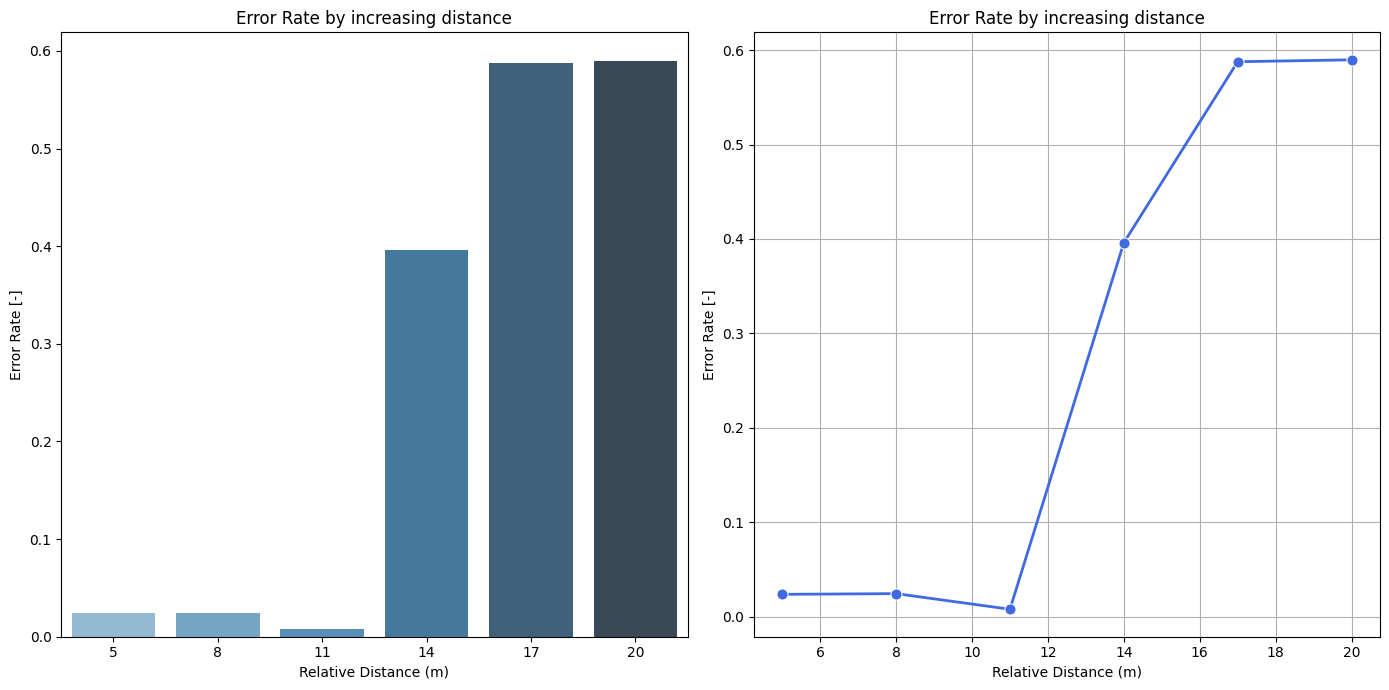

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 7))

# Bar plot
plt.subplot(1, 2, 1)
sns.barplot(data=specified_distance_summary, x='nearest_distance', y='error_rate', palette="Blues_d")
plt.title('Error Rate by increasing distance')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]')

# Line plot
plt.subplot(1, 2, 2)
sns.lineplot(data=specified_distance_summary, x='nearest_distance', y='error_rate', marker='o', color='royalblue', linewidth=2, markersize=8)
plt.title('Error Rate by increasing distance')
plt.xlabel('Relative Distance (m)')
plt.ylabel('Error Rate [-]')
plt.grid(True)

plt.tight_layout()
plt.show()

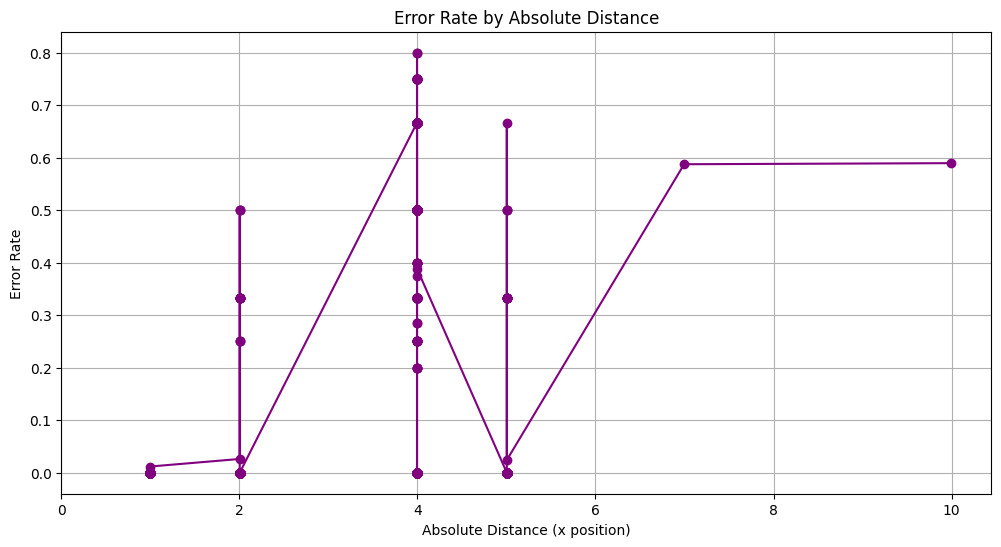

In [51]:
#Make all distances positive
import pandas as pd
import os

import matplotlib.pyplot as plt
data['distance_x'] = data['distance_x'].abs()

# Save the cleaned data to a new CSV file
cleaned_file_path = os.path.expanduser('~/Desktop/MRS_Master_Project/rosbags/simulation/combined_standard_static_cleaned.csv')

data.to_csv(cleaned_file_path, index=False)

cleaned_file_path, data.head(50)  # Return the path to the new CSV and display the first few rows of the cleaned data.



error_rate_by_abs_distance = data.groupby('distance_x')['is_error'].mean().sort_index()
# Plot error rates with absolute distances
plt.figure(figsize=(12, 6))
plt.plot(error_rate_by_abs_distance.index, error_rate_by_abs_distance.values, marker='o', linestyle='-', color='purple')
plt.title('Error Rate by Absolute Distance')
plt.xlabel('Absolute Distance (x position)')
plt.ylabel('Error Rate')
plt.grid(True)
plt.xlim(left=0)  # Ensure x-axis starts from 0
plt.show()

In [47]:
data.head(50)  # Display the first few rows of the cleaned data.

,timestamp,distance_x,value,is_error,adjusted_distance_x
0,54.148,5.004249,0.0,0,10.004249
1,54.148,5.004249,3.0,0,10.004249
2,54.152,5.004249,2.0,0,10.004249
3,54.164,5.004249,2.0,0,10.004249
4,54.168,5.004249,0.0,0,10.004249
5,54.168,5.004249,3.0,0,10.004249
6,54.180,5.004249,0.0,0,10.004249
7,54.180,5.004249,2.0,0,10.004249
8,54.184,5.004249,3.0,0,10.004249
9,54.196,5.004249,2.0,0,10.004249


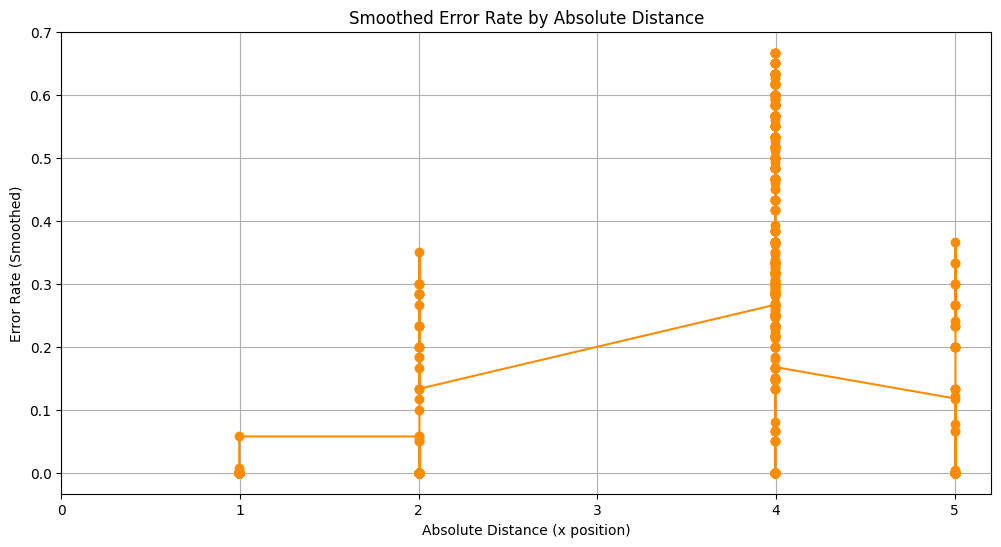

In [45]:
# Apply a moving average to smooth the data and reduce spikes
# Choosing a window size that balances smoothness with retaining the underlying trend
window_size = 5
smoothed_error_rate_abs = error_rate_by_abs_distance.rolling(window=window_size, center=True).mean()

# Plot the smoothed error rates against absolute distances
plt.figure(figsize=(12, 6))
plt.plot(smoothed_error_rate_abs.index, smoothed_error_rate_abs.values, marker='o', linestyle='-', color='darkorange')
plt.title('Smoothed Error Rate by Absolute Distance')
plt.xlabel('Absolute Distance (x position)')
plt.ylabel('Error Rate (Smoothed)')
plt.grid(True)
plt.xlim(left=0)  # Ensure x-axis starts from 0
plt.show()

0.9957509721555614


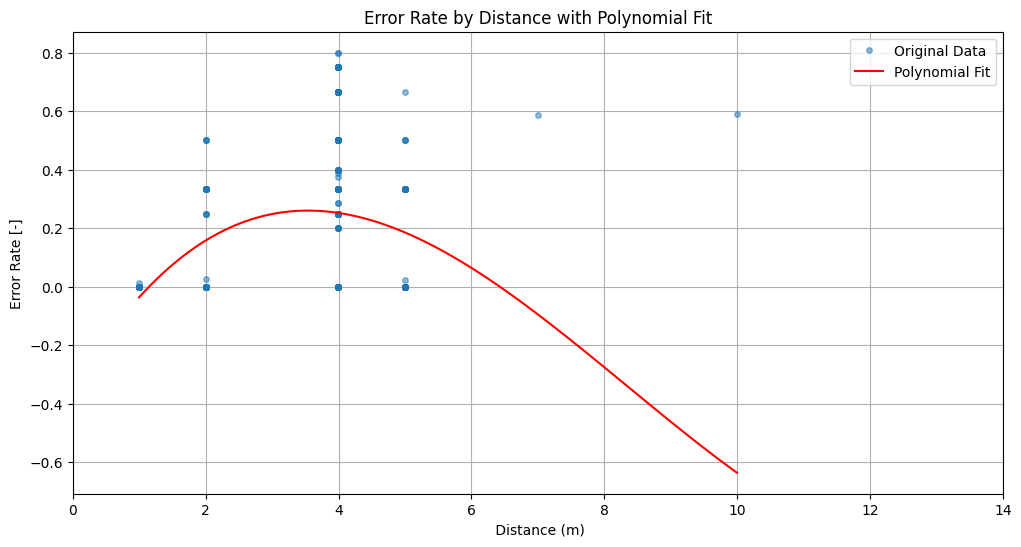

In [62]:
from numpy import polyfit, poly1d
import numpy as np


data['adjusted_distance_x'] = data['distance_x'] + 0
# Recalculate error rates with the adjusted distances
error_rate_by_adjusted_distance = data.groupby('adjusted_distance_x')['is_error'].mean().sort_index()

left_bound = error_rate_by_adjusted_distance.index.min()
print(left_bound)


# Fit a polynomial regression to the adjusted data
coef_adjusted = polyfit(error_rate_by_adjusted_distance.index, error_rate_by_adjusted_distance.values, 3)
poly_adjusted = poly1d(coef_adjusted)

# Generate x and y values for the polynomial fit over the adjusted distances
x_poly_adjusted = np.linspace(error_rate_by_adjusted_distance.index.min(), error_rate_by_adjusted_distance.index.max(), 100)
y_poly_adjusted = poly_adjusted(x_poly_adjusted)

# Plot the original data and the polynomial regression line with adjusted distances
plt.figure(figsize=(12, 6))
plt.plot(error_rate_by_adjusted_distance.index, error_rate_by_adjusted_distance.values, 'o', markersize=4, alpha=0.5, label='Original Data')
plt.plot(x_poly_adjusted, y_poly_adjusted, 'r-', label='Polynomial Fit')
plt.title('Error Rate by Distance with Polynomial Fit')
plt.xlabel(' Distance (m)')
plt.ylabel('Error Rate [-]')
plt.legend()
plt.grid(True)
plt.xlim(left_bound)  # Adjust the left bound to reflect the distance adjustment
#More descriptive x-limit
plt.xlim(left=0, right=14)
plt.show()

